In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backends = service.backends(simulator=False,min_num_qubits=5)
print(backends)

[<IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibm_brisbane')>]


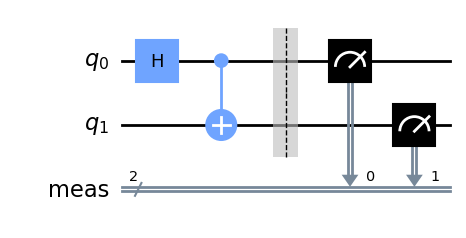

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0,1)
qc.measure_all()
qc.draw("mpl")

In [ ]:
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
job = Sampler(backend='ibm_lagos').run(qc)

Suyash:516 | Jai Vignesh:522 | Anushka:534


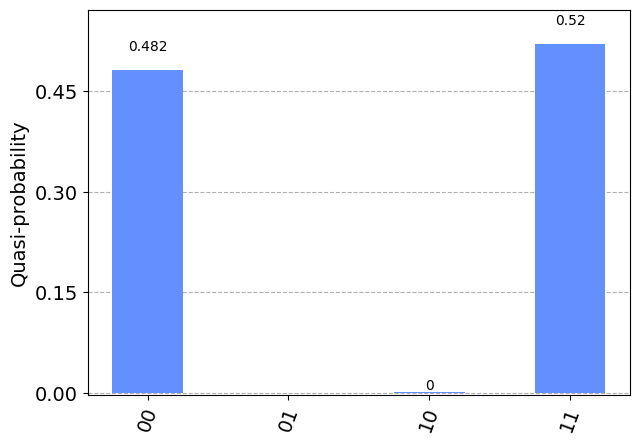

In [11]:
print("Suyash:516 | Jai Vignesh:522 | Anushka:534")
result = job.result().quasi_dists[0].binary_probabilities()
plot_histogram(result)



# Grover's Search Algorithm



In [5]:
from qiskit import *
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram


a_string = QuantumRegister(1, name='a string')
b_string = QuantumRegister(1, name='b string')
c_string = QuantumRegister(1, name='c string')
d_string = QuantumRegister(1, name='d string')

all_0_ancilla_ab = QuantumRegister(2, name='all 0  ancilla ab')
all_0_ancilla_cd = QuantumRegister(2, name='all 0  ancilla cd')
all_0_ancilla_ac = QuantumRegister(2, name='all 0  ancilla ac')
all_0_ancilla_bd = QuantumRegister(2, name='all 0  ancilla bd')

out = QuantumRegister(1,name='output')

classical = ClassicalRegister(4, name='measure')

qc = QuantumCircuit(a_string, b_string, c_string, d_string, all_0_ancilla_ab,
    all_0_ancilla_cd, all_0_ancilla_ac, all_0_ancilla_bd, out, classical)

#out in -
qc.x(out)
qc.h(out)

#superposition of input
qc.h(a_string[0])
qc.h(b_string[0])
qc.h(c_string[0])
qc.h(d_string[0])

qc.barrier()


def oracle(qc):

    # comparator ab
    qc.x(b_string[0])
    qc.mct([a_string[0], b_string[0]], all_0_ancilla_ab[0])
    qc.x(a_string[0])
    qc.x(b_string[0])
    qc.mct([a_string[0], b_string[0]], all_0_ancilla_ab[1])
    qc.x(a_string[0])
    qc.cnot(all_0_ancilla_ab[0], all_0_ancilla_ab[1])
    qc.barrier()

    # comparator ac
    qc.x(c_string[0])
    qc.mct([a_string[0], c_string[0]], all_0_ancilla_ac[0])
    qc.x(a_string[0])
    qc.x(c_string[0])
    qc.mct([a_string[0], c_string[0]], all_0_ancilla_ac[1])
    qc.x(a_string[0])
    qc.cnot(all_0_ancilla_ac[0], all_0_ancilla_ac[1])
    qc.barrier()

    # comparator cd
    qc.x(d_string[0])
    qc.mct([d_string[0], c_string[0]], all_0_ancilla_cd[0])
    qc.x(c_string[0])
    qc.x(d_string[0])
    qc.mct([d_string[0], c_string[0]], all_0_ancilla_cd[1])
    qc.x(c_string[0])
    qc.cnot(all_0_ancilla_cd[0], all_0_ancilla_cd[1])
    qc.barrier()

    # comparator bd
    qc.x(b_string[0])
    qc.mct([d_string[0], b_string[0]], all_0_ancilla_bd[0])
    qc.x(d_string[0])
    qc.x(b_string[0])
    qc.mct([d_string[0], b_string[0]], all_0_ancilla_bd[1])
    qc.x(d_string[0])
    qc.cnot(all_0_ancilla_bd[0], all_0_ancilla_bd[1])
    qc.barrier()


def diffuser(qc):

    qc.h(a_string[0])
    qc.h(b_string[0])
    qc.h(c_string[0])
    qc.h(d_string[0])

    qc.x(a_string[0])
    qc.x(b_string[0])
    qc.x(c_string[0])
    qc.x(d_string[0])

    qc.h(a_string[0])
    qc.mct([ b_string[0], c_string[0], d_string[0]], a_string[0])
    qc.h(a_string[0])

    qc.x(a_string[0])
    qc.x(b_string[0])
    qc.x(c_string[0])
    qc.x(d_string[0])

    qc.h(a_string[0])
    qc.h(b_string[0])
    qc.h(c_string[0])
    qc.h(d_string[0])

    qc.barrier()


#n is the number of iteration of Grover operator
n = 2

for i in range (n):

    oracle(qc)
    qc.mct([all_0_ancilla_ab[1], all_0_ancilla_ac[1],all_0_ancilla_cd[1],
        all_0_ancilla_bd[1]], out)
    qc.barrier()

    oracle(qc)
    diffuser(qc)

qc.measure(a_string[0],classical[0])
qc.measure(b_string[0],classical[1])
qc.measure(c_string[0],classical[2])
qc.measure(d_string[0],classical[3])

qc.draw()

def print_sudoku(dict):
    list=[]
    for item in dict:
        for a in item:
            list.append(a)
        data=np.array(list)
        shape=(2,2)
        sudoku=data.reshape(shape)
        print(sudoku)
        print('\n')
        list.clear()

#start simulation
service = QiskitRuntimeService()
backend = service.get_backend('ibmq_qasm_simulator')
job = Sampler(backend=backend).run(qc,shots=512)
result = job.result()
print(result)

SamplerResult(quasi_dists=[{2: 0.02734375, 14: 0.01953125, 1: 0.044921875, 8: 0.01953125, 13: 0.0390625, 10: 0.0234375, 15: 0.03515625, 4: 0.033203125, 6: 0.333984375, 9: 0.2109375, 5: 0.025390625, 12: 0.0390625, 3: 0.041015625, 0: 0.03515625, 7: 0.05078125, 11: 0.021484375}], metadata=[{'shots': 512, 'circuit_metadata': {}}])


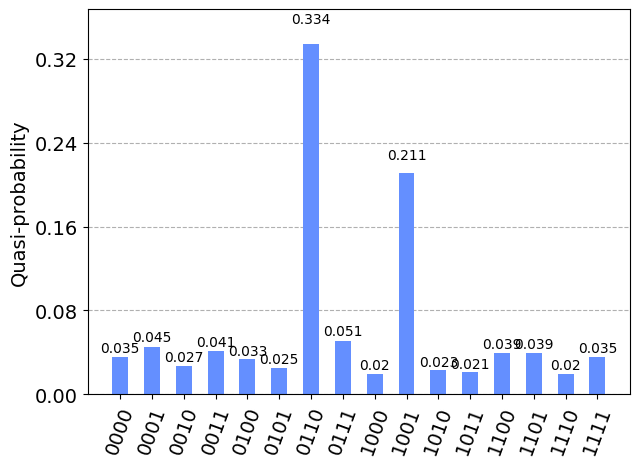

In [8]:
plot_histogram(result.quasi_dists[0].binary_probabilities())